In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## A glimpse of how the dataframe looks like:

In [2]:
movie_frame = pd.read_csv('movie_frame.csv')
movie_frame.tail()

,title,year,director,actors,critic_rating,user_rating,rating_diff,rating_diff_abs,keywords,outcome
1003,Shadow of a Doubt,1943,Alfred Hitchcock,"Teresa Wright,Joseph Cotten,Macdonald Carey,He...",94.0,79.0,-15.0,15.0,"murderer,serial killer,amateur detective,psych...",True
1004,Spindesys,1996,Scott Hicks,"Geoffrey Rush,Justin Braine,Sonia Todd,Chris H...",87.0,77.0,-10.0,10.0,"piano,pianist,australia,abuse,concert,concert ...",False
1005,Take This Waltz,2011,Sarah Polley,"Michelle Williams,Seth Rogen,Luke Kirby,Sarah ...",68.0,66.0,-2.0,2.0,"actress breaking typecast,husband wife relatio...",True
1006,Yosemite,2015,Gabrielle Demeestere,"James Franco,Everett Meckler,Troy Tinnirello,C...",59.0,48.0,-11.0,11.0,"f rated,grazed by bullet,grazed by a bullet,bu...",False
1007,The Sisters Brothers,2018,Jacques Audiard,"John C. Reilly,Joaquin Phoenix,Jake Gyllenhaal...",78.0,72.0,-6.0,6.0,"thieves on the run,shootout,brother brother re...",True


# I Part - some EDA:

In [3]:
#extracting the numeric data from the dataframe
num_data = movie_frame[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs','outcome']]

### From the violin plots below it is visible that preferred movies have a tendency to have higher both critic rating and user rating. in addition, critic rating has lower variability for positive outcome movies

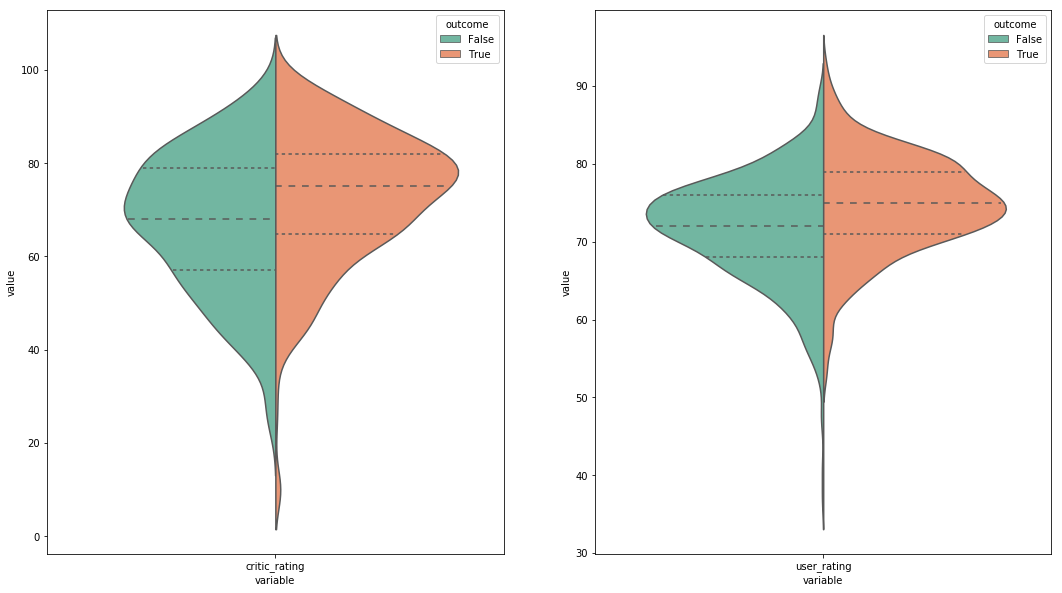

In [57]:
vp1 = pd.melt(num_data, id_vars='outcome', value_vars=['critic_rating'])
vp2 = pd.melt(num_data, id_vars='outcome', value_vars=['user_rating'])
fig, ax = plt.subplots(1,2, figsize=(18,10))
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp1, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp2, ax=ax[1])


## Rating difference between "true" outcome movies and "false" outcome movies also differes a little bit.
    
### First plot indicates that even though the positive outcome movies have move skewed to the left rating_difference and the medians are rather close to one another but there's still a tendency that positive sentiment movies have higher critic rating than user compared to the negative sentiment movies because the mode is a negative number

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


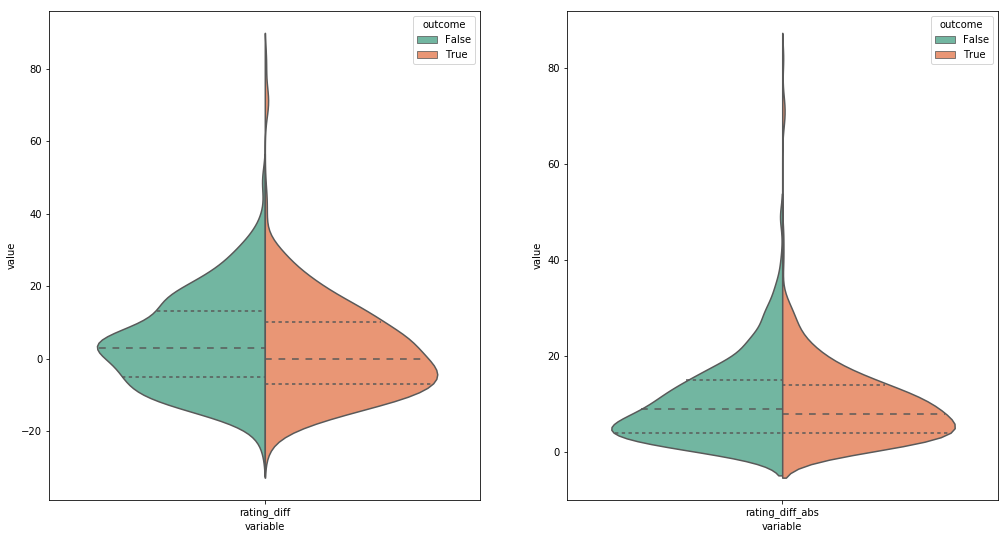

In [59]:
vp3 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff'])
vp4 = pd.melt(num_data, id_vars='outcome', value_vars=['rating_diff_abs'])

fig, ax = plt.subplots(1,2, figsize=(17,9))

sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp3, ax=ax[0])
sns.violinplot(x='variable', y='value', hue='outcome', split=True, inner='quartile', palette="Set2", data=vp4, ax=ax[1])
fig.show()


## Below are graphs for visualisizngthe relationships between the numeric data and whether there is any separation between positive sentiment and negative sentiment samples

### The scatters are quite overlapping but there's barely visible red dots being clustered(meaning positive outcome movies) as opposed to the blue ones in second picture where high critic rating movies have lower user ratings. this information would correspond with the violin plot above

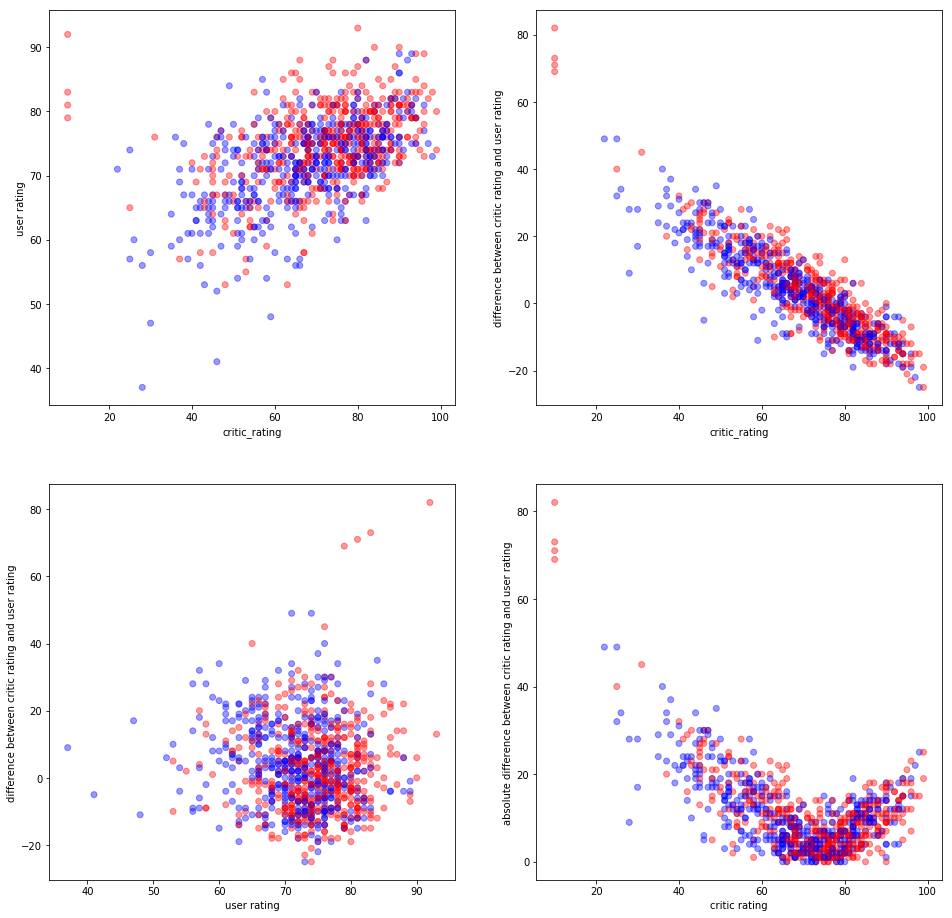

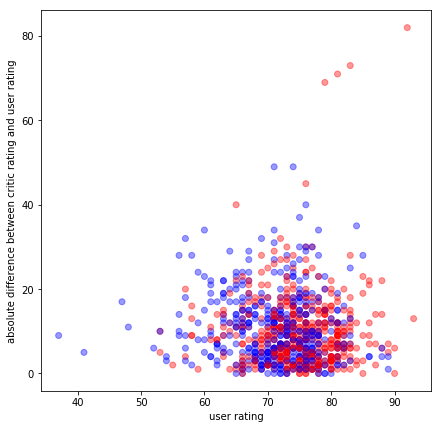

In [154]:
fig, ax = plt.subplots(2,2, figsize=(16,16)) 
colors1 = {True:'red', False:'blue'}

ax[0,0].scatter(num_data['critic_rating'], num_data['user_rating'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,0].set_xlabel('critic_rating')
ax[0,0].set_ylabel('user rating')


ax[0,1].scatter(num_data['critic_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[0,1].set_xlabel('critic_rating')
ax[0,1].set_ylabel('difference between critic rating and user rating')

ax[1,0].scatter(num_data['user_rating'], num_data['rating_diff'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,0].set_xlabel('user rating')
ax[1,0].set_ylabel('difference between critic rating and user rating')

ax[1,1].scatter(num_data['critic_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
ax[1,1].set_xlabel('critic rating')
ax[1,1].set_ylabel('absolute difference between critic rating and user rating')


fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(num_data['user_rating'], num_data['rating_diff_abs'], color=num_data['outcome'].apply(lambda x: colors1[x]), alpha=0.4)
plt.xlabel('user rating')
plt.ylabel('absolute difference between critic rating and user rating')
plt.show()



### Trying out both the t-Distributed Stochastic Neighbor Embedding  and PCA fot visualising if there is some division between the numeric data with true outcome versus false outcome.
### As the picture below shows there is some sort division between True and False outcome numeric data but the clustering after dimention reduction is not too clearly perceptible.

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

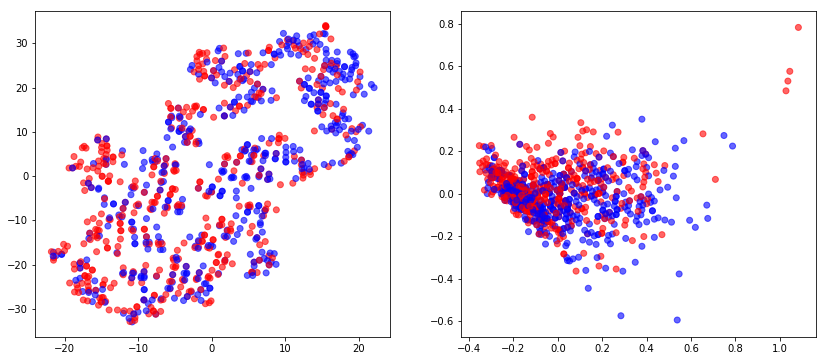

In [5]:
x_nonull = num_data.loc[num_data['critic_rating'].notnull()] #eliminating null values
x_num = x_nonull[['critic_rating', 'user_rating', 'rating_diff', 'rating_diff_abs']].values

x_num_scaled = MinMaxScaler().fit_transform(x_num) #normalizing the data 
y_num = x_nonull[['outcome']].values


pca_result = PCA(n_components=2).fit_transform(x_num_scaled)
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_result = tsne.fit_transform(x_num_scaled)
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
colors = {True:'red', False:'blue'}
ax1.scatter([i[0] for i in tsne_result], [i[1] for i in tsne_result], color=x_nonull['outcome'].apply(lambda x: colors[x]), alpha=0.6)
ax2.scatter([i[0] for i in pca_result], [i[1] for i in pca_result], color=x_nonull['outcome'].apply(lambda x: colors[x]), alpha=0.6)
  
    


## Applying SVM algorithm as a classification model

###### from the model evaluation it is seen that True outcome can be predicted with a 77% accuracy, False outcome however - only 54%


In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix
 
X = x_num_scaled
Y = np.ravel(y_num.astype(int))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)  


svclassifier = SVC(kernel='rbf', gamma='auto')  
svclassifier.fit(x_train, y_train)
ySVM_prediction = svclassifier.predict(x_test)
 
print(classification_report(y_test,ySVM_prediction))  

              precision    recall  f1-score   support

           0       0.69      0.54      0.61        67
           1       0.64      0.77      0.70        71

   micro avg       0.66      0.66      0.66       138
   macro avg       0.67      0.66      0.65       138
weighted avg       0.67      0.66      0.65       138



## Preparing to visualise actors and directors by the two sentiments:

In [275]:
outcomes = movie_frame['outcome'].values
#since every movie has a list of actors, I need to separate each actor from the list:
actors = [i.split(',') for i in movie_frame['actors'].values] 

actors_values = [] #the list will be filled with an actor ant their outcome for each movie they are in
for n in range(len(actors)):
    a_v = [actors[n], outcomes[n]] #re-joining the actors with their outcome
    for i in range(len(a_v[0])):
        actors_values.append([a_v[0][i],a_v[1]])
actor_frame = pd.DataFrame(actors_values, columns=['actor', 'outcome']) #actor and outcome dataframe

#adding count column for each actor for the number of times they appeared in the the movies dataset
actor_frame['count'] = actor_frame.groupby(['actor'])['outcome'].transform('count') 
#will be visualising the actors that appeared in 10 and more movies
actor_frame = actor_frame.loc[actor_frame['count']>9]

In [ ]:
import pixiedust 
pixiedust.display(actor_frame)

## Actors that appeared in 10 or more movies and the sentiment they carry based on the movie outcome
#### (visual of the graph that should have been visible above )

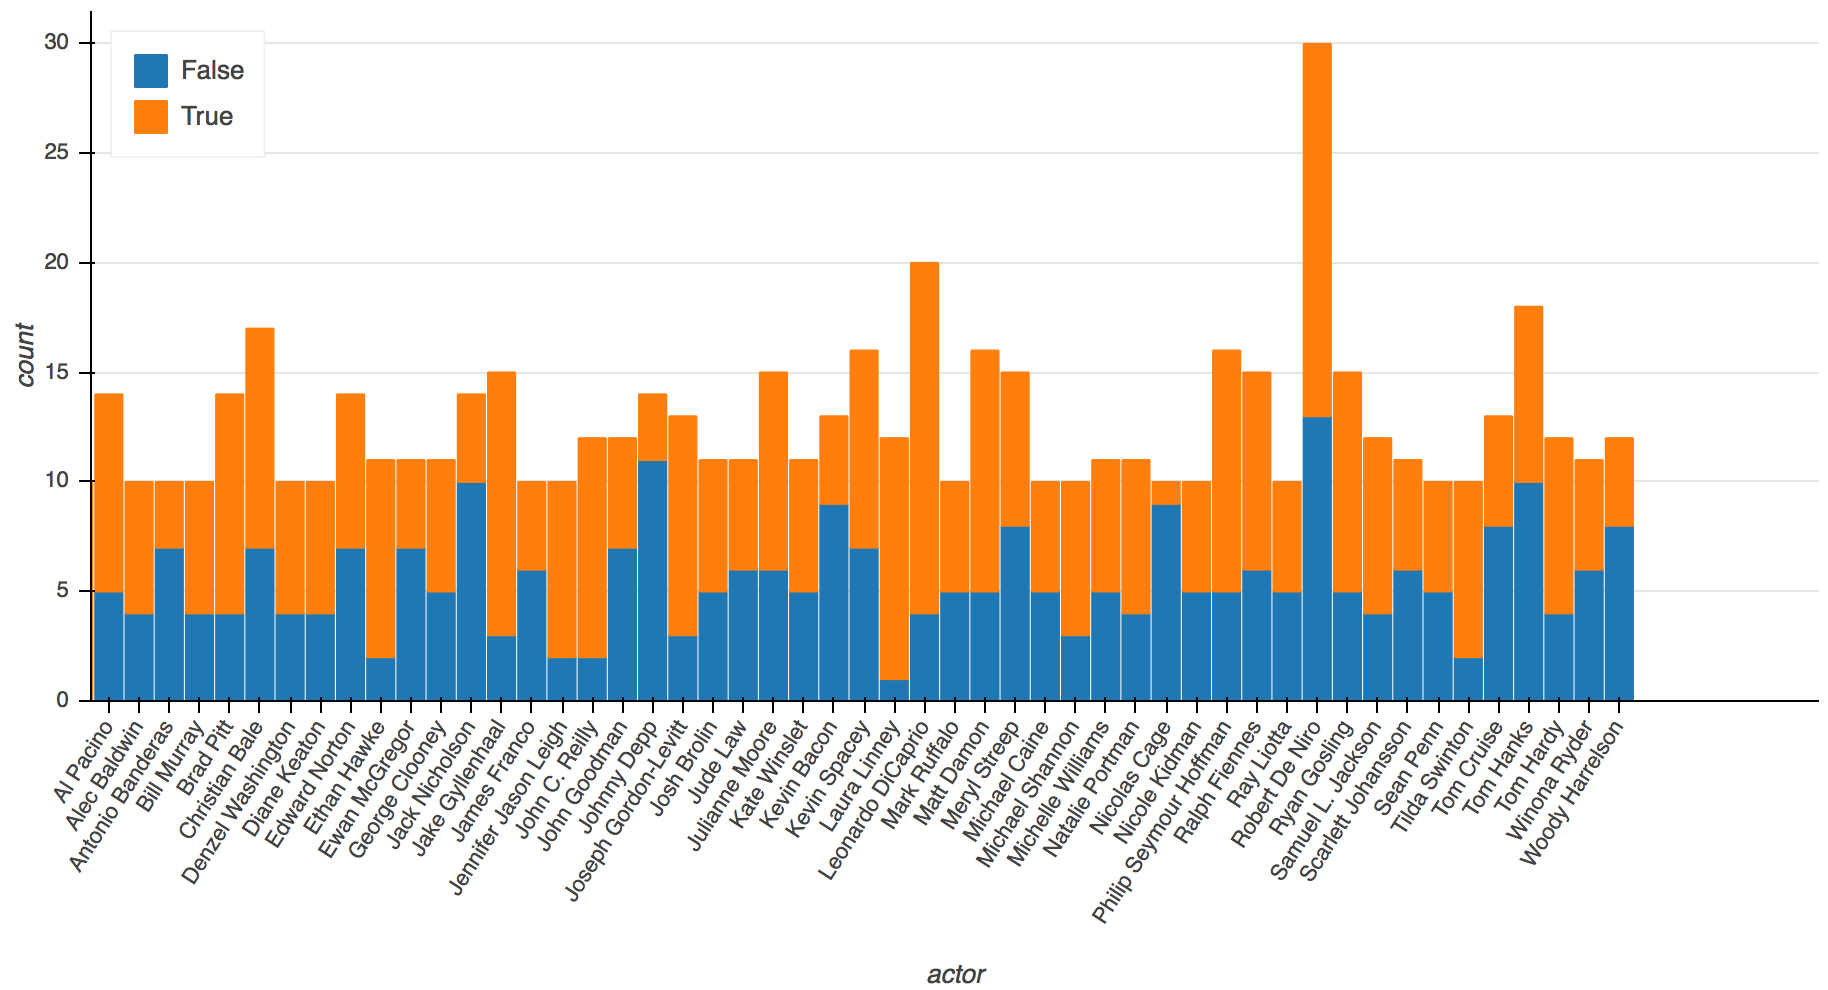

In [311]:
director_frame = movie_frame[['director', 'outcome']]
director_frame['count'] = director_frame.groupby(['director'])['outcome'].transform('count')
 
pixiedust.display(director_frame)

## Directors that appeared in 4 or more movies and the sentiment they carry based on the movies they directed 
#### the graph shows the strongest positive sentiment to Quentin Tarnatino, Dennis Villenueve, Martin Scorsese, Noah Baumach, Richard Linklater, Terrence Malick, Woody Allen

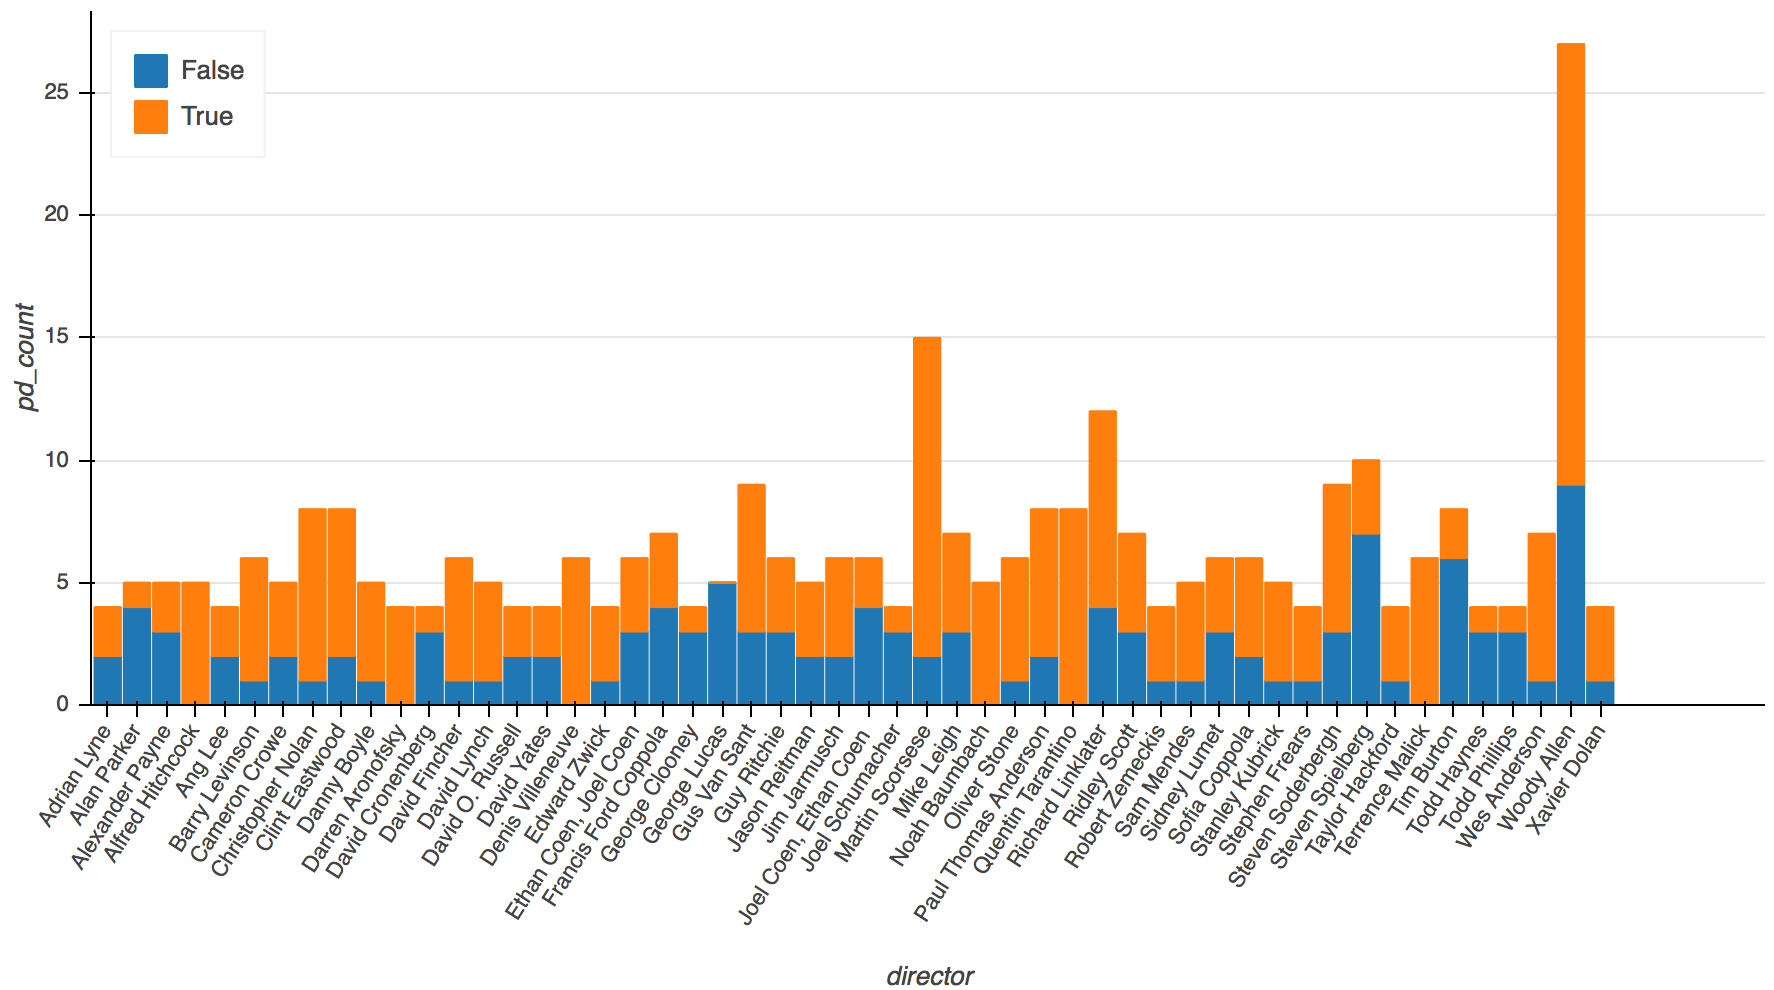

<font size="6">Keywords visualisation:</font>

In [32]:
#extract the list of keywords and outcome related to them
keywords = movie_frame['keywords'].values
outcome = movie_frame['outcome'].astype(int)

#splitting the keywords to separate strings, making all words lower-case and eliminating those samples that don't have keywords
keywords_lower = []
outcome_l = []
for i,e in zip(keywords,outcome):
    t0 = i.split(',')
    t = [w.lower() for w in t0] 
    if len(t)>1:
        keywords_lower.append(t)
        outcome_l.append(e)
        

### Trying to figure out if recurrent keywords are somewhat exclusive for either True or False outcome of a movie.
    
#### However this didn't help much, both positive and negative sentiment movies mostly have recurring theme of death and relationships. Black background graph is for False outcome movies and white for True.

### At this point it was decided to take a look into movie reviews. Therefore web scraping for new data started taking place



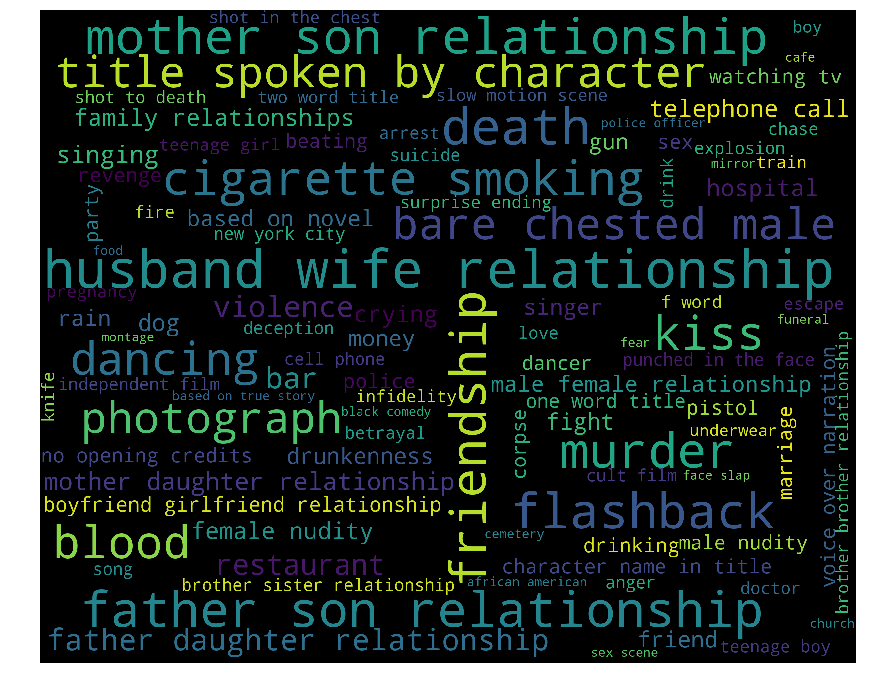

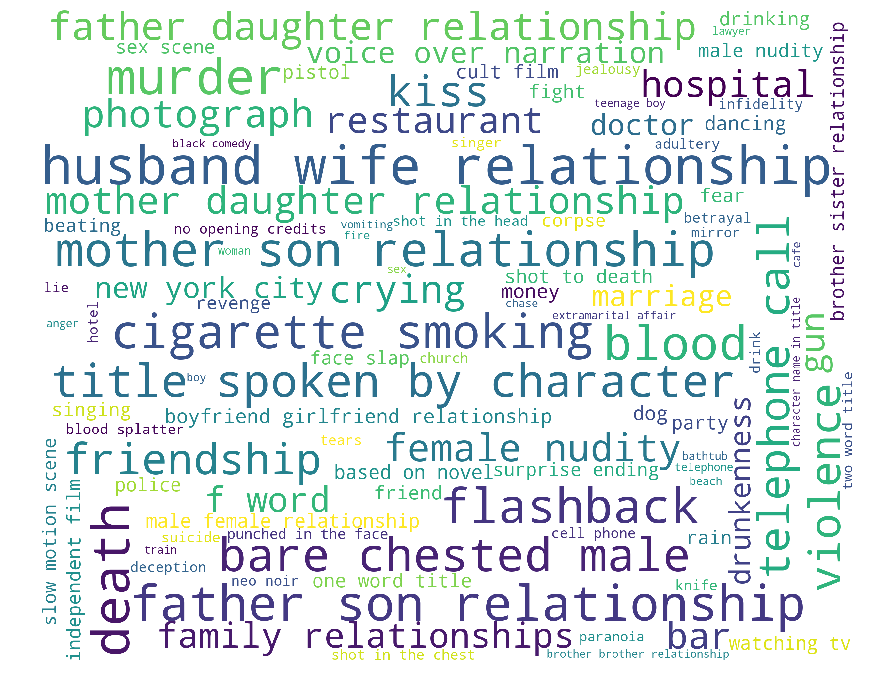

In [77]:
from wordcloud import WordCloud

def kw_wordcloud_draw(y, x, out=0, color = 'black'):
    indexes = np.where(np.array(y)==out)[0].tolist() #get the indexes for either true or false outcome
    phrases = [x[i] for i in indexes] #select the keyword phrases related with either true or false outcome
    whole = [item for sublist in phrases for item in sublist]
    frequencies = Counter(whole) #dictionary of phrases and their frequency
    wordcloud = WordCloud(background_color=color,width=2500,height=2000, max_words=100).generate_from_frequencies(frequencies)
    plt.figure(1,figsize=(18, 12)) 
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
kw_wordcloud_draw(outcome_l, keywords_lower, out=0, color = 'black')
kw_wordcloud_draw(outcome_l, keywords_lower, out=1, color = 'white')

# II Part - critic reviews

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /Users/gabaslava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
#opening the gathered critic reviews:
review_and_outcome = pd.read_csv('review_and_outcome.csv').values

In [28]:
#tokenizing the review texts:

text = [i[0] for i in review_and_outcome if pd.notnull(i[0])] 
outcome = [i[1] for i in review_and_outcome if pd.notnull(i[0])]
stop_words = set(stopwords.words('english'))

tokenized_text = []
for i in text:
    t1 = word_tokenize(i) #separating all the words into separate strings
    t2 = [w.lower() for w in t1] #converting to lower-case
    t3 = [w for w in t2 if w.isalpha()] #remove all elements that are not alpahbetical
    t0 = [w for w in t3 if not w in stop_words] #eliminating stop-words
    tokenized_text.append(t0)
    
#getting rid of the the texts that have 100 words and less
X=[]
Y=[]
for i,e in zip(tokenized_text,outcome):
    if len(i)>100:
        X.append(i)
        Y.append(e)

### Review sample now consists of 2.2K reviews: 1144 categorized as True and 1056 as False

In [31]:
Counter(Y)

Counter({False: 1056, True: 1144})

### Longest review consists of 5527 words, shortest - 101 words.
### On average review has 460 words with std of 229.
### Total word count for all reviews combined is over 1M.

In [32]:
max_len = max([len(i) for i in X])
min_len = min([len(i) for i in X])
mean_x = np.mean([len(i) for i in X])
std_x = np.std([len(i) for i in X])
total_x = sum([len(i) for i in X]) #total word count/non-unique

max_len, min_len, mean_x, std_x, total_x 

(5527, 101, 460.1786363636364, 229.397769660939, 1012393)

## Dataframes with unique words and their count for true and false outcome

In [96]:
X_true=[]
X_false=[]
for i,e in zip(X,Y):
    if e == True:
        X_true += i
    elif e == False:
        X_false += i
true_unique =  pd.DataFrame.from_dict(Counter(X_true), orient='index').reset_index().sort_values(by=[0], ascending=False)
false_unique = pd.DataFrame.from_dict(Counter(X_false), orient='index').reset_index().sort_values(by=[0], ascending=False)


### There is 36,935 unique words in True outcome, and 34,976 words in False

In [97]:
len(true_unique), len(false_unique) 

(36935, 34976)

### Extracting top 5000 words for each outcome and of those taking only the ones that are exclusively belonging to either one of the categories. 
### Each category has 960words that are most common for their own outcome and at the same time not as common in the contradicting outcome

In [108]:
top5000_true = list(true_unique[:5000]['index'].values)
top5000_false = list(false_unique[:5000]['index'].values)
exp_true_in_top5000 = [i for i in top5000_true if i not in top5000_false]
exp_false_in_top5000 = [i for i in top5000_false if i not in top5000_true]

In [109]:
len(exp_true_in_top5000), len(exp_false_in_top5000)

(960, 960)

### Converting strings of words into vectors with Word2Vec model from gensim.
#### Vector dimentionality size will be 100, meaning each unique word will be represented with a vector of 100 numbers. Only words that occur 10 or more times will be vectorized. After the model was applied, there were 12726 unique words left in total(words that occured set number of times in the whole text corpus)

In [112]:
import gensim

model=gensim.models.Word2Vec(sentences=X, size=100, window=5, min_count=10) 
model.train(X, total_examples=len(X), epochs=3) 
unique_words=list(model.wv.vocab) 
len(unique_words) 

12726

### Checking what words have similar vectorization to words 'human', 'politics' or 'profound'
#### The meaning of words is in context of the critic reviews

In [49]:
model.wv.most_similar('human'), model.wv.most_similar('profound'), model.wv.most_similar('politics')

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


([('nature', 0.8789588809013367),
  ('beings', 0.8519634008407593),
  ('humanity', 0.8281970024108887),
  ('moral', 0.8214859366416931),
  ('personal', 0.8214455246925354),
  ('individual', 0.8195074796676636),
  ('condition', 0.8044508099555969),
  ('guilt', 0.7914494276046753),
  ('issues', 0.79100501537323),
  ('insight', 0.7903071641921997)],
 [('observation', 0.9624413251876831),
  ('authentic', 0.9597456455230713),
  ('intellectual', 0.948772668838501),
  ('underlying', 0.9450331926345825),
  ('irony', 0.9448376893997192),
  ('core', 0.9444955587387085),
  ('exploration', 0.9432898163795471),
  ('succeeds', 0.9401899576187134),
  ('confronting', 0.9399322271347046),
  ('extent', 0.938260555267334)],
 [('notion', 0.9394418001174927),
  ('religious', 0.9307196736335754),
  ('economic', 0.9225436449050903),
  ('machines', 0.9149338006973267),
  ('metaphor', 0.9127864837646484),
  ('alternate', 0.901120662689209),
  ('spiritual', 0.8977338075637817),
  ('changing', 0.8968161940574646

In [50]:
#saving the the word-vectors:
filename = 'gensim_word2vec1.csv'
model.wv.save_word2vec_format(filename, binary=False)

In [53]:
#creating a dictionary of words and their vectors
def word_and_vec(vectors_file):
    embeddings = {}
    f = open(vectors_file)
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings[word] = vector
    f.close()
    return embeddings

word_embeddings = word_and_vec('gensim_word2vec1.csv')


### Now vectorizing the sample texts. 
#### To standartize the texts they will all be transformed into 500x100 matrixes, i.e. 500 words and 100 numbers for each word, texts that have less than 500words after vectorization(that means that some words are cut instantlhy because they don't have a vector to represent them) will be padded with zeros and longer texts will be cut.


In [86]:
#mapping vectors to words in the text:
def sentences_vectorized(sentences, embeddings, vec_dim, sentence_length, unique_word_emb):
    vectorized_corpus=np.zeros((len(sentences), sentence_length, vec_dim)) 
    for review,i in zip(sentences,range(len(sentences))):
        vectorized_reveiew = np.array([embeddings[word] for word in review if word in unique_word_emb]) 
        if len(vectorized_reveiew)<sentence_length:
            vectorized_reveiew.resize((sentence_length, vec_dim), refcheck=False)
            vectorized_corpus[i]=np.array(vectorized_reveiew)
        else:
            vectorized_corpus[i]=vectorized_reveiew[:sentence_length]
    return vectorized_corpus

vectorized_text_corpus = sentences_vectorized(X, word_embeddings, 100, 500, unique_words)

In [57]:
vectorized_text_corpus.shape #that's 2200 samples, each of 500 words, each word represented by 100D vector

(2200, 500, 100)

### Separating positive sentiment vectorized reviews and negative sentiment word vectors.
#### Those separated lists consist of 445,095 word-vectors that were in reviews marked as True and 400,169 word-vectors that were in reviews marked False


In [58]:
def separate_true_false_review_words(vectorized_sentences, outcome):
    word_vectors_true = []
    word_vectors_false = []   
    for i,e in zip(vectorized_sentences,outcome):
        for word in i:
            if all(np.array(word)!=0):
                if e==True:
                    word_vectors_true.append(word)
                elif e==False:
                    word_vectors_false.append(word)
    return word_vectors_true, word_vectors_false


word_vectors_true, word_vectors_false = separate_true_false_review_words(vectorized_text_corpus, Y)

len(word_vectors_true), len(word_vectors_false)   

(445095, 400169)

### Reducing vector dimentionality with t-distributed stochastic neighbor embedding and visualising the vectors in 2D to find out if they form some kind of clusters:

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

In [62]:
tsne= TSNE(n_components=2, perplexity=40, n_iter=500)

#since original sample sizes are to big, let's randomly select 10% of the population
true_sample = random.sample(word_vectors_true, 40000)
tsne_results_true = tsne.fit_transform(true_sample)
false_sample = random.sample(word_vectors_false, 40000)
tsne_results_false = tsne.fit_transform(false_sample)

### Clusters in the below image are too much intertwined.
#### Therefore next step is reducing the dimentionality with principal component analysis before applying TSNE

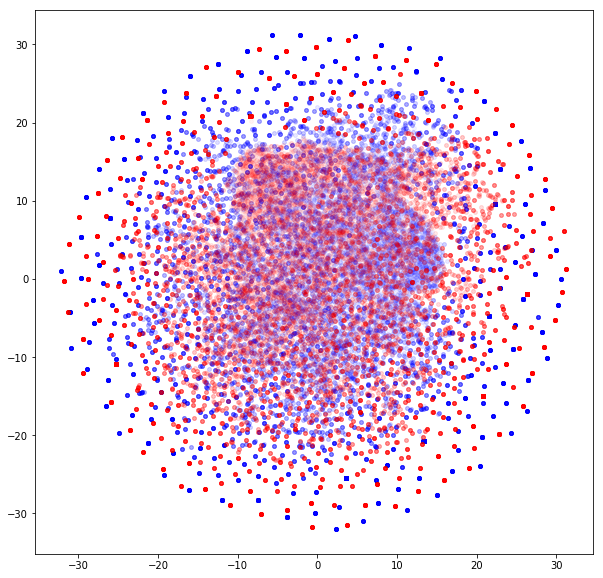

In [68]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
true = ax1.scatter([i[0] for i in tsne_results_true], [i[1] for i in tsne_results_true], s=15, c='b', marker="o", alpha=0.06, label='true')
false = ax1.scatter([i[0] for i in tsne_results_false], [i[1] for i in tsne_results_false], s=15, c='r', marker="o", alpha=0.06 label='false')
ax1.legend((false,true), ('Negative sentiment', 'Positive sentiment'))
plt.show()

### Creating a visual using PCA for reducing the 100 dimentions to 30. And then applying TSNE on principal components.


In [78]:
#reducing the 100dimentions to 30:
pca_true = PCA(n_components=30).fit_transform(word_vectors_true)
pca_false = PCA(n_components=30).fit_transform(word_vectors_false)
#applying tSNE:
tsne= TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_results_true2 = tsne.fit_transform(pca_true)
tsne_results_false2 = tsne.fit_transform(pca_false)

'tsne= TSNE(n_components=2, perplexity=40, n_iter=500)\ntsne_results_true2 = tsne.fit_transform(pca_true)\ntsne_results_false2 = tsne.fit_transform(pca_false)'

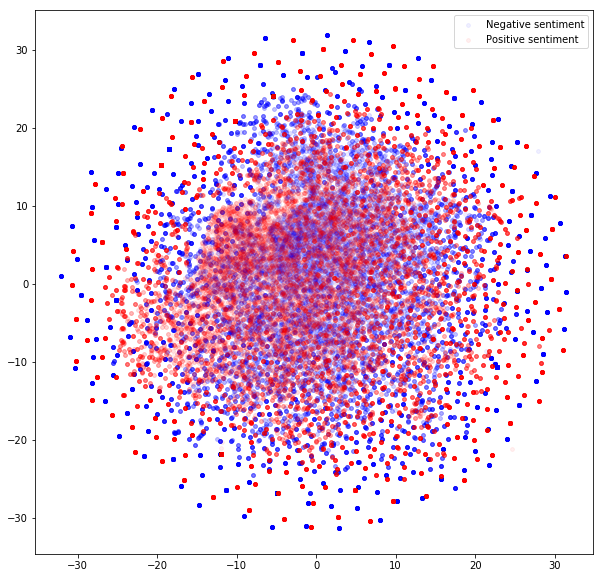

In [83]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
false = ax1.scatter([i[0] for i in tsne_results_true2], [i[1] for i in tsne_results_true2], s=15, c='b', marker="o", label='false', alpha=0.06)
true = ax1.scatter([i[0] for i in tsne_results_false2], [i[1] for i in tsne_results_false2], s=15, c='r', marker="o", label='true', alpha=0.06)
ax1.legend((false,true), ('Negative sentiment', 'Positive sentiment'))
plt.show()

## Vectorizing the uniquely common words:

In [114]:
def words_vectorized(words, embeddings, vec_dim, unique_word_emb):
    vectorized_words=np.zeros((len(words), vec_dim)) 
    for w,i in zip(words,range(len(words))):
        if w in unique_word_emb:
            vectorized_words[i] = embeddings[w]
        else:
            vectorized_words[i] = np.zeros(50)
    return vectorized_words

exp_true_vectors = words_vectorized(exp_true_in_top5000, word_embeddings, 100, unique_words)
exp_false_vectors = words_vectorized(exp_false_in_top5000, word_embeddings, 100, unique_words)

## Reducing dimentions with both PCA and tSNE and visualising the words from different outcomes
### from the two graphs it is clear that with tSNE the true/false words separate slightly better 

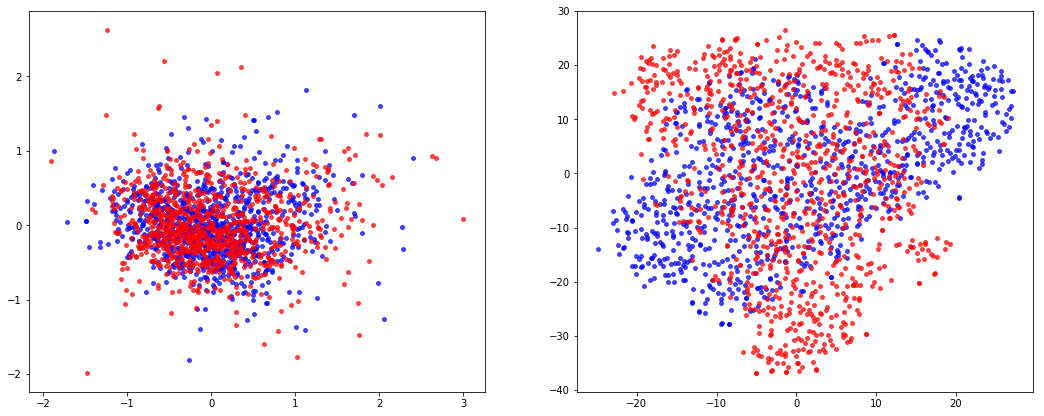

In [127]:
pca_true_exp = PCA(n_components=2).fit_transform(exp_true_vectors)
pca_false_exp = PCA(n_components=2).fit_transform(exp_false_vectors)

tsne = TSNE(n_components=2, perplexity=35, n_iter=500)
tsne_true_exp = tsne.fit_transform(exp_true_vectors)
tsne_false_exp = tsne.fit_transform(exp_false_vectors)


fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter([i[0] for i in pca_false_exp], [i[1] for i in pca_false_exp], s=15, c='b', marker="o", label='false', alpha=0.7)
ax1.scatter([i[0] for i in pca_true_exp], [i[1] for i in pca_true_exp], s=15, c='r', marker="o", label='true', alpha=0.7)

ax2.scatter([i[0] for i in tsne_false_exp], [i[1] for i in tsne_false_exp], s=15, c='b', marker="o", label='false', alpha=0.7)
ax2.scatter([i[0] for i in tsne_true_exp], [i[1] for i in tsne_true_exp], s=15, c='r', marker="o", label='true', alpha=0.7)



# Using GloVe pre-trained embedding 
### GloVe is Stanford University pre-trained word embedding with a dictionary of 400K unique words. Pre-trained word vectors downloaded from: https://nlp.stanford.edu/projects/glove/

In [88]:
file = "glove.6B.50d.txt" #word embeddings - 50 vector dimentionality
def loadGloveModel(File):
    with open(File, encoding="utf8" ) as f:
        content = f.readlines()
    word_embeddings = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        word_embeddings[word] = embedding
    print ("Done.",len(word_embeddings)," words loaded!")
    return word_embeddings
     
glove_embs = loadGloveModel(file) 
glove_unique_words = list(glove_embs.keys()) 


Done. 400000  words loaded!


In [91]:
glove_vectorized_sentences = sentences_vectorized(X, glove_embs, 50, 2600, glove_unique_words)
glove_words_true, glove_words_false = separate_true_false_review_words(glove_vectorized_sentences, Y)

In [92]:
len(glove_words_true), len(glove_words_false)

(534643, 469141)

## TSNE for GloVe embedded text

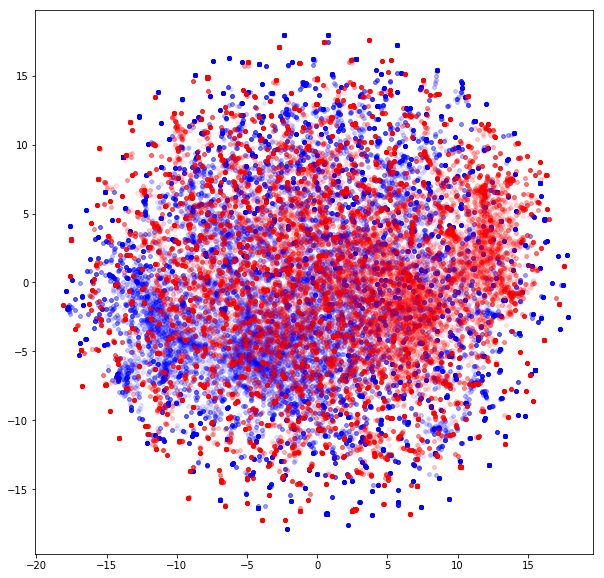

In [93]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)

#get sample
glove_true_sample = random.sample(glove_words_true, 40000)
glove_false_sample = random.sample(glove_words_false, 40000)

glove_tsne_sample_true = tsne.fit_transform(glove_true_sample)
glove_tsne_sample_false = tsne.fit_transform(glove_false_sample)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
false = ax1.scatter([i[0] for i in glove_tsne_sample_true], [i[1] for i in glove_tsne_sample_true], s=15, c='b', marker="o", label='false', alpha=0.1)
true = ax1.scatter([i[0] for i in glove_tsne_sample_false], [i[1] for i in glove_tsne_sample_false], s=15, c='r', marker="o", label='true', alpha=0.1)
plt.show()

## Visualising only most common words, vectorized with GloVe model:

In [129]:
exp_true_glove_vectors = words_vectorized(exp_true_in_top5000, glove_embs, 50, glove_unique_words)
exp_false_glove_vectors = words_vectorized(exp_false_in_top5000, glove_embs, 50, glove_unique_words)

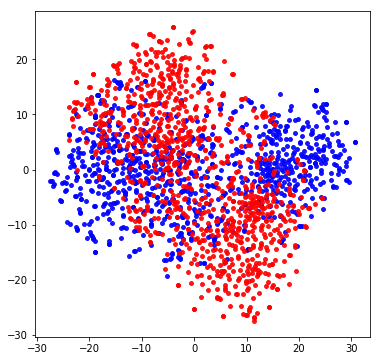

In [138]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)

glove_tsne_exp_true = tsne.fit_transform(exp_true_glove_vectors)
glove_tsne_exp_false = tsne.fit_transform(exp_false_glove_vectors)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
false = ax1.scatter([i[0] for i in glove_tsne_exp_true], [i[1] for i in glove_tsne_exp_true], s=15, c='b', marker="o", label='false', alpha=0.9)
true = ax1.scatter([i[0] for i in glove_tsne_exp_false], [i[1] for i in glove_tsne_exp_false], s=15, c='r', marker="o", label='true', alpha=0.9)
plt.show()

## Establishing that GloVe word embedding fits better, the next step is testing out LSTM, GRU and Convolutional networks for training a model